In [1]:
# To assist the scatter plot decisions, find the (histogram) distribution of the name lengths
import collections

import compress_pickle
import copy
import editdistance
import itertools
import libsbml
import numpy as np
import os
import pickle
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline  

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")

PROJ_DIR = os.path.join(os.getcwd(), os.pardir)
AMAS_DIR = os.path.join(PROJ_DIR, "AMAS")
sys.path.append(PROJ_DIR)

SUPPL_DIR = os.path.join(PROJ_DIR, os.pardir, "AMAS_suppl")
ACCURACY_DIR = os.path.join(SUPPL_DIR, "data_for_credibility")

MANU_FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Manu_figures_new'
SUPPL_FIGURE_DIR = '/Users/woosubshin/Desktop/AutomateAnnotation/writeup/AMAS/Supple_figures_new'

from AMAS import species_annotation as sa
from AMAS import reaction_annotation as ra
from AMAS import recommender
from AMAS import constants as cn
from AMAS import iterator as it
from AMAS import tools

In [2]:
biomodels = [val for val in os.listdir(BIOMODEL_DIR) if val[-4:]=='.xml']
biggs = [val for val in os.listdir(BIGG_DIR) if val[-4:]=='.xml']
print(len(biomodels))
print(len(biggs))

1000
108


In [3]:
# First, biomodels plot
spec_biomd_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_species_accuracy.csv'))
print(spec_biomd_df.shape)

spec_bigg_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'bigg_individual_species_accuracy.csv'))
print(spec_bigg_df.shape)

(4902, 6)
(133233, 6)


In [4]:
spec_biomd_df.head()

,model,name_length,num_candidates,num_formulas,match_score,accuracy
0,BIOMD0000000634.xml,3,6,5,1.000,1
1,BIOMD0000000634.xml,3,13,11,1.000,1
2,BIOMD0000000634.xml,3,14,12,1.000,1
3,BIOMD0000000152.xml,2,7,5,1.000,1
4,BIOMD0000000152.xml,15,1,1,0.873,0


In [5]:
print("Bimodels: maximum length of the query term: %d" % np.max(spec_biomd_df['name_length']))
print("Biggs: maximum length of the query term: %d" % np.max(spec_bigg_df['name_length']))

Bimodels: maximum length of the query term: 122
Biggs: maximum length of the query term: 147


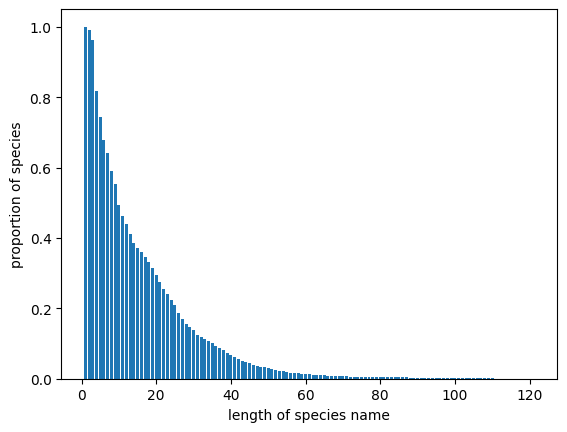

In [6]:
xs = []
ys = []
total_elements = spec_biomd_df.shape[0]
for one_len in range(1, np.max(spec_biomd_df['name_length'])):
  xs.append(one_len)
  ys.append(spec_biomd_df[spec_biomd_df['name_length']>=one_len].shape[0]/total_elements)
    
plt.bar(xs, ys)
plt.xlabel("length of species name")
plt.ylabel("proportion of species")
# plt.title("Biomodels: Length of query terms vs. Proportion of species")

FIGURE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'
TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')
plt.savefig(os.path.join(SUPPL_FIGURE_DIR, 'barplot_biomd_name_length.pdf'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

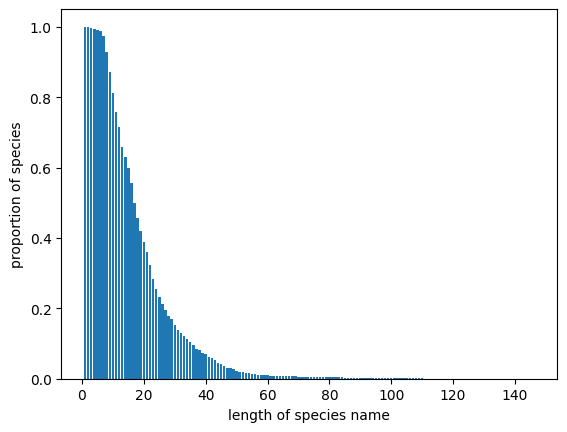

In [7]:
xs = []
ys = []
total_elements = spec_bigg_df.shape[0]
for one_len in range(1, np.max(spec_bigg_df['name_length'])):
  xs.append(one_len)
  ys.append(spec_bigg_df[spec_bigg_df['name_length']>=one_len].shape[0]/total_elements)
    
plt.bar(xs, ys)
plt.xlabel("length of species name")
plt.ylabel("proportion of species")
# plt.title("BiGG: Length of query terms vs. Proportion of species")

FIGURE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'
TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')
plt.savefig(os.path.join(SUPPL_FIGURE_DIR, 'barplot_bigg_name_length.pdf'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

In [ ]:
# Reactions?

In [29]:
len(cn.REF_CHEBI2FORMULA)

148331